## File information

File: Assignment_5.1.ipynb

Name: Amie Davis

Date: 1/5/2021

Course: DSC650 - Big Data

Assignment Number: 5.1

Purpose: Implement the movie review classifier found in section 3.4 of Deep Learning with Python. 

# Classifying movie reviews: a binary classification example
## This file contains code from Deep Learning with Python

www.manning.com/books/deep-learning-with-python

Copyright 2018 Francois Chollet

## Data Source: The IMDB dataset - comes packaged with Keras. 

In [2]:
import keras
keras.__version__

'2.3.1'

## Load the data

In [3]:
# Use Keras imdb dataset for movie reviews
# Data is labeled 0 for negative reviews and 1 for positive reviews
# Split data into training & test datasets 
# Keep the top 10,000 most frequently occurring words
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Review Data
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# Review Labels
train_labels[0]

1

## Prepare the data

In [6]:
# Use one-hot-encoding to turn data into vectors of 0s and 1s
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Vectorize training data
x_train = vectorize_sequences(train_data)

# Vectorize test data
x_test = vectorize_sequences(test_data)

In [7]:
# Review Vectorized Data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build Keras Neural Network Model

In [9]:
# Define the model
from keras import models
from keras import layers

# input_shape is size of data vector
# 16 hidden layers
# Use sigmoid for output fxn since binary classification problem
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# Compile Model

# Use binary_crossentropy for binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Validate Model

In [11]:
# Create Validation Set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# Train Model
# Collect measurement logs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.4974 - accuracy: 0.7881 - val_loss: 0.3757 - val_accuracy: 0.8659
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2911 - accuracy: 0.9089 - val_loss: 0.3138 - val_accuracy: 0.8773
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - accuracy: 0.9269 - val_loss: 0.2860 - val_accuracy: 0.8869
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1745 - accuracy: 0.9431 - val_loss: 0.2853 - val_accuracy: 0.8871
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1398 - accuracy: 0.9557 - val_loss: 0.2879 - val_accuracy: 0.8867
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1177 - accuracy: 0.9645 - val_loss: 0.2979 - val_accuracy: 0.8830
Epoch 7/20
15000/15000 [==============================] - 1s 94us/

In [13]:
# Set measurement history logs
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

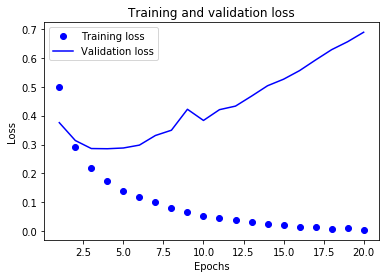

In [15]:
# Plot the training and validation loss 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

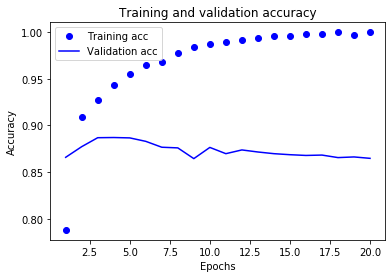

In [16]:
# Plot the training and validation accuracy

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Re-Train & Evaluate Model

In [17]:
# Re-train model based on plots
# Accuracy gets lower at 5 epochs
# Loss increases around 4.5
# Re-train with 5 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 69us/step - loss: 0.4344 - accuracy: 0.8267
Epoch 2/5
25000/25000 [==============================] - 2s 61us/step - loss: 0.2475 - accuracy: 0.9108
Epoch 3/5
25000/25000 [==============================] - 2s 60us/step - loss: 0.1961 - accuracy: 0.9282
Epoch 4/5
25000/25000 [==============================] - 2s 61us/step - loss: 0.1654 - accuracy: 0.9417
Epoch 5/5
25000/25000 [==============================] - 2s 92us/step


In [18]:
# Show Evaluation results
results

[0.32810947559833525, 0.8750399947166443]

Achieves an accuracy of 87.5%

##  Use Model to Generate predictions

In [19]:
# Show predictions
# Likely Positive - Close to 1
# Likely Negative - Close to 0
# Indeterminate - Close to 0.5

model.predict(x_test)

array([[0.12863287],
       [0.99971986],
       [0.6582345 ],
       ...,
       [0.05825239],
       [0.03601018],
       [0.5615906 ]], dtype=float32)